In [19]:
using CSV
using DataFrames
using PyPlot
using Statistics
using Random
using LaTeXStrings

# (optional) check out all of the styles! https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("Solarize_Light2")

# (optional)change settings for all plots at once, e.g. font size
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16

16

watch this [hilarious video](https://fivethirtyeight.com/features/not-even-scientists-can-easily-explain-p-values/) where scientists are asked to explain the p-value in one sentence. challenge yourself to explain a p-value in one sentence after going through this notebook.

# A/B testing

> In modern data analytics, deciding whether two numerical samples come from the same underlying distribution is called A/B testing. The name refers to the labels of the two samples, A and B. [source](https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html)

how many cauliflowers are allocated to each group?

In [6]:
df = CSV.read("cauliflower.csv", copycols=true)
first(df, 6)

,group,mass
,String,Float64
1,control,905.204
2,fertilizer,910.038
3,fertilizer,892.856
4,control,828.234
5,control,715.818
6,fertilizer,701.48


compare the distribution of masses among the two groups (control, treatment) in two ways:
* two opaque histograms on top of each other
* two box plots next to each other

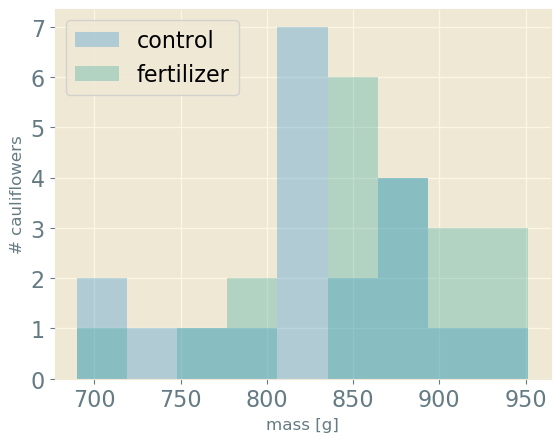

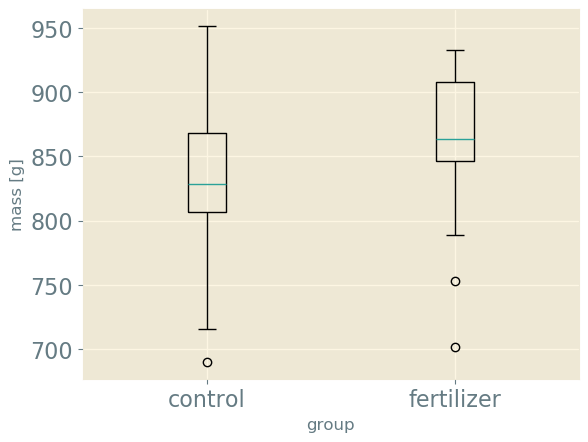

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


PyObject Text(25.0, 0.5, 'mass [g]')

In [13]:
###
# (1) two histograms
#do not manually make bins, it will silently cut out data
bins = range(minimum(df[:, :mass]), stop=maximum(df[:, :mass]), length=10) # shared bins

figure()
for df_g in groupby(df, :group) #groupby loops over the different groups 
    groub = df_g[1, :group]
    hist(df_g[:, :mass], label=groub, alpha=0.3, bins=bins)
end
legend()
xlabel("mass [g]")
ylabel("# cauliflowers")
show()

###
# (2) two boxplots
groups = ["control", "fertilizer"]
figure()
boxplot([filter(cauli -> cauli[:group] == group, df)[:, :mass] for group in groups]) #this is an array of 2 arrays 

xticks([1, 2], groups) #relabels x markings
xlabel("group")
ylabel("mass [g]")

the distribution of masses of cauliflowers in the fertilizer group appears to be biased to the right of the distribution of masses of cauliflowers in the control group.

the average cauliflower mass in the fertilizer group is greater than the average mass in the control group.

In [15]:
by(df, :group, avg_mass=:mass => mean) #pass data frame, what to look in, new column name, 
#what to look at in each and what function to apply to it

,group,avg_mass
,String,Float64
1,control,827.462
2,fertilizer,859.655


**this difference in means could be due to chance, owing to the random process of allocating the cauliflowers to the control and treatment groups!** 

                         #distribution refers to the whole population 
**null hypothesis**: The distribution of masses amoung cauli's treated with fertilizer is identical to that of those in the control group. 
**alternative hypothesis**: The distribution of masses amoung cauli's treated with fertilizer is diffrent from those in the control group 

*test statistic* := (mean mass of cauli's in fertilizer group) - (mean mass of cauli's in control group) #if null is true this is zero 

this test statistic is a random variable. if we could repeat the cauliflower experiment over and over...


## compute the test statistic
first, write a function that computes the mean mass of cauliflowers falling in a particular group ("control" or "fertilizer").

then, write a function that computes the difference in means between the two groups.

In [22]:
function μ_mass(df_cauli::DataFrame, group_col_name::Symbol, group::String)
    df_group = (filter(cauli->cauli[group_col_name] == group, df_cauli))
    #V2
        #df_means = by(df_cauli, group_col_name, avg_mass=:mass=>mean)
    #V3 one line
        # resturn mean((filter(cauli->cauli[group_col_name] == group, df_cauli))[:, :mass])
    return mean(df_group[:, :mass])
end

μ_mass(df, :group, "control")

827.4623135088772

In [24]:
for group in ["control", "fertilizer"]
    println("{mass $group cauli}= ", μ_mass(df, :group, group))
end

{mass control cauli}= 827.4623135088772
{mass fertilizer cauli}= 859.655362579846


## randomly permuting the group labels: simulating the test statistic under the null hypothesis
how do we simulate a repetition of this random experiment and obtain its test statistic (= difference in mean masses between fertilized and control cauli's) under the null hypothesis?


indeed, the test statistic is different (unless we happen to assing the cauliflowers to the same group, which is very unlikely).

## obtain the distribution of the test statistic under the null hypothesis

let us now simulate repititions of the random experiment under the null hypothesis 10000 times, record the difference in means among the two groups, then plot the distribution of the difference in means 

now plot the distribution of the difference of means under the null hypothesis

why is the difference in means centered around zero? because, under the null hypothesis, there is no difference in the mean mass between the control and treatment groups!

## compare distribution of test statistic to our observed test statistic, compute p-value



the **p-value** is the proportion of simulated experiments under the null hypothesis where the difference in means was equal to or more extreme than what we observed in the actual experiment.

In [ ]:
p_value = 